# Supervised Learning: Fraud Detection in E-Commerce

## Problem Definition
The objective of this study is to develop a binary classification model capable of detecting fraudulent e-commerce transactions. The target variable represents whether a transaction is fraudulent (`1`) or legitimate (`0`). The outcome of this model is intended to support the early identification of fraudulent activity, improving online transaction security.

## Dataset Description
This project utilizes two publicly available datasets:
- `Dataset1.csv`: A detailed transactional dataset that includes demographic, behavioral, and transactional features.
- `Dataset2.csv`: A more compact dataset focused on user and transaction metadata.

Given their complementary nature, these datasets will be merged to construct a richer feature space for model training.
However, the datasets present differences in their structure and attribute naming, which necessitates a standardization process before merging.

## Setup and Data Loading
We begin by importing the necessary libraries and loading the datasets.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Load datasets
dataset1 = pd.read_csv('Datasets/Dataset1.csv')
dataset2 = pd.read_csv('Datasets/Dataset2.csv')

### Column Comparison
We first inspect the structure of both datasets to identify differences in column names and schema.

In [2]:
print("Dataset 1 Columns:\n", dataset1.columns, "\n")
print("Dataset 2 Columns:\n", dataset2.columns)

Dataset 1 Columns:
 Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object') 

Dataset 2 Columns:
 Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


### Standardization
Several columns in dataset2 refer to similar concepts as those in dataset1, although with different names. We rename those columns to ensure semantic alignment.

In [3]:
dataset2_renamed = dataset2.rename(columns={
    'user_id': 'Customer ID',
    'purchase_time': 'Transaction Date',
    'purchase_value': 'Transaction Amount',
    'ip_address': 'IP Address',
    'age': 'Customer Age',
    'class': 'Is Fraudulent'
})

Additionally, we add missing columns with 'NaN' to maintain consistency across datasets.

In [4]:
missing_columns = set(dataset1.columns) - set(dataset2_renamed.columns)
for col in missing_columns:
    dataset2_renamed[col] = np.nan

# Align column order to match dataset1
dataset2_aligned = dataset2_renamed[dataset1.columns]

dataset2_aligned[dataset2_aligned.isna().any(axis=1)] #display the rows with na values

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,NaN,22058,34,2015-04-18 02:47:11,NaN,NaN,NaN,39,NaN,NaN,7.327584e+08,NaN,NaN,0,NaN,NaN
1,NaN,333320,16,2015-06-08 01:38:54,NaN,NaN,NaN,53,NaN,NaN,3.503114e+08,NaN,NaN,0,NaN,NaN
2,NaN,1359,15,2015-01-01 18:52:45,NaN,NaN,NaN,53,NaN,NaN,2.621474e+09,NaN,NaN,1,NaN,NaN
3,NaN,150084,44,2015-05-04 13:54:50,NaN,NaN,NaN,41,NaN,NaN,3.840542e+09,NaN,NaN,0,NaN,NaN
4,NaN,221365,39,2015-09-09 18:40:53,NaN,NaN,NaN,45,NaN,NaN,4.155831e+08,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,NaN,345170,43,2015-03-29 00:30:47,NaN,NaN,NaN,28,NaN,NaN,3.451155e+09,NaN,NaN,1,NaN,NaN
151108,NaN,274471,35,2015-05-26 12:24:39,NaN,NaN,NaN,32,NaN,NaN,2.439047e+09,NaN,NaN,0,NaN,NaN
151109,NaN,368416,40,2015-05-20 07:07:47,NaN,NaN,NaN,26,NaN,NaN,2.748471e+09,NaN,NaN,0,NaN,NaN
151110,NaN,207709,46,2015-09-07 09:34:46,NaN,NaN,NaN,37,NaN,NaN,3.601175e+09,NaN,NaN,0,NaN,NaN


### Merging the Datasets
With both datasets now aligned in schema, we concatenate them into a single unified dataset.

In [5]:
merged_data = pd.concat([dataset1, dataset2_aligned], ignore_index=True)

# Preview the merged dataset
merged_data.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1.0,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30.0,5.0
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2.0,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72.0,8.0
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2.0,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63.0,3.0
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5.0,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124.0,20.0
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2.0,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158.0,5.0


### Removal of Non-Analytical Columns
The merged dataset contains several columns; however, some of these, such as 'Transaction ID' and 'Customer ID', do not provide meaningful analytical value. As such, we will exclude these from the dataset.
The 'Shipping Address' and 'Billing Address' columns, while not directly useful for analysis on their own, may hold important insights regarding the potential for fraudulent activity when compared. Specifically, the match between these two addresses could indicate suspicious behavior. Therefore, instead of keeping both columns, we will create a new binary column, "Address Match," that will store 1 if the shipping and billing addresses match, and 0 if they do not.

In [6]:
merged_data.drop(columns=['Transaction ID', 'Customer ID', 'IP Address'], inplace=True)

merged_data['Address Match'] = (merged_data['Shipping Address'] == merged_data['Billing Address']).astype(int)

merged_data.drop(columns=['Shipping Address', 'Billing Address'], inplace=True)

# Preview the merged dataset
merged_data.head()
"Transaction.Hour","source","browser","sex","Payment.Method","Product.Category","Quantity","Device.Used","Address.Match"


('Transaction.Hour',
 'source',
 'browser',
 'sex',
 'Payment.Method',
 'Product.Category',
 'Quantity',
 'Device.Used',
 'Address.Match')

### Missing Value Analysis and Processing
We evaluate the presence of missing data in the merged dataset, which will guide the preprocessing steps that follow.

In [7]:
print("Missing values per column:\n", merged_data.isnull().sum())

Missing values per column:
 Transaction Amount         0
Transaction Date           0
Payment Method        151112
Product Category      151112
Quantity              151112
Customer Age               0
Customer Location     151112
Device Used           151112
Is Fraudulent              0
Account Age Days      151112
Transaction Hour      151112
Address Match              0
dtype: int64


To address missing values effectively, we will employ probability-based imputation. This approach leverages the distribution of known values within the dataset to generate plausible replacements for missing entries. By doing so, we maintain the integrity of the data while minimizing potential biases introduced by arbitrary filling methods.

In [8]:
def calculate_probabilities(col):
    '''Calculates the probability of the value appearing in the data frame'''
    data = merged_data[col][merged_data[col].notna()]
    probabilities = data.value_counts(normalize = True)
    return probabilities
print(calculate_probabilities("Device Used")) #just to show how the function works


Device Used
mobile     0.333849
tablet     0.333302
desktop    0.332849
Name: proportion, dtype: float64


In [9]:
#Perform the insertion of value in NA cells
for column in merged_data.columns:
    probabilities = calculate_probabilities(column)
    
    # Identify missing values
    na_mask = merged_data[column].isna()

    # Efficiently replace missing values using NumPy's choice function
    merged_data.loc[na_mask, column] = np.random.choice(list(probabilities.index), size=len(merged_data.loc[na_mask, column]), p=probabilities.values)

Now, there should not be any NA value in the dataframe.

In [10]:
print(f'Number of NA values in column \"Device Used \" : {merged_data.loc[merged_data["Device Used"].isna(), "Device Used"].count()}')

Number of NA values in column "Device Used " : 0


## Row Selection

The merged dataset has more than 1.5 milion rows. This huge number of rows makes the algorithms and other computaions very hard to perform. To make the dataset easier to process, we are going to select, randomly, 20% of the rows to procede the analysis.

In [11]:
import os

# only creates and stores a sample if it doesn't exists yet
if not os.path.exists("Datasets/sample_dataset.csv"):
    data_sample = merged_data.sample(frac=0.2)
    data_sample.to_csv("Datasets/sample_dataset.csv", index=False)

merged_data = pd.read_csv("Datasets/sample_dataset.csv")

## Outliers and Strange Values

In this section, we will identify outliers and other anomalies that may introduce biases or distort the integrity of the dataset. By detecting and addressing these irregular values, we aim to enhance data reliability and improve analytical accuracy.

Firstly, we need to plot the data to better visualize it.

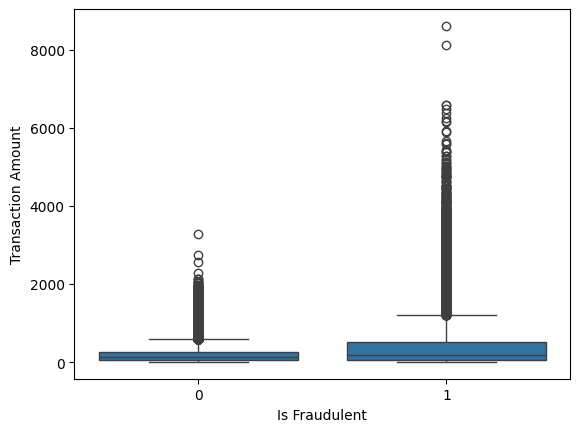

In [12]:
#Transaction amount comparison between fraudulent and legitimate transactions
sb.boxplot(x="Is Fraudulent", y="Transaction Amount", data=merged_data)
plt.show()

The plot reveals that fraudulent transactions exhibit a wider range of transaction amounts, but they tend to be larger than non-fraudulent transactions overall. Additionally, some values significantly exceed expected ranges, particularly within fraudulent transactions. 
To enhance precision and maintain data consistency, we need to remove rows where fraudulent transactions exceed 7,000 and non-fraudulent transactions surpass 2,500

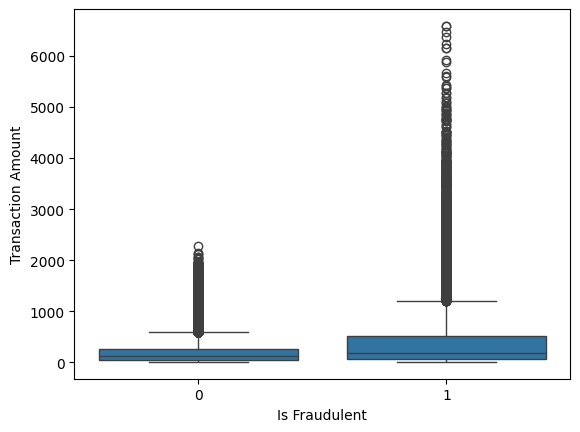

In [13]:
merged_data = merged_data[((merged_data["Transaction Amount"] < 7000) & (merged_data["Is Fraudulent"] == 1)) | ((merged_data["Transaction Amount"] < 2500) & (merged_data["Is Fraudulent"] == 0))]

sb.boxplot(x="Is Fraudulent", y="Transaction Amount", data=merged_data)
plt.show()

The data is now more consistent. However, some values in the fraudulent transactions still appear abnormal. To enhance precision, we can filter out rows where fraudulent transaction amounts exceed 5,500. This step will help eliminate significant outliers. Additionally, as a precautionary measure, we should remove any rows with transaction amounts below zero.

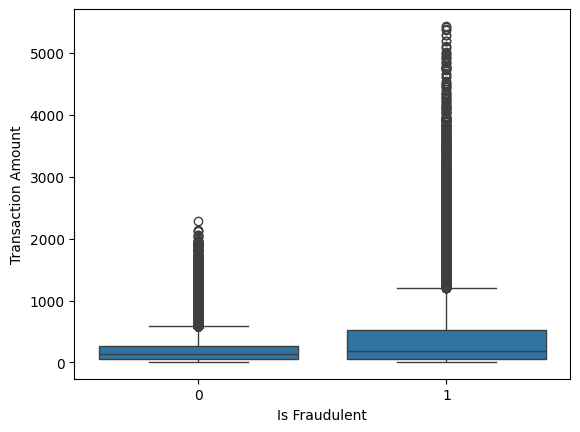

In [14]:
merged_data = merged_data[((merged_data["Transaction Amount"] < 5500) & (merged_data["Is Fraudulent"] == 1)) | ((merged_data["Transaction Amount"] < 2500) & (merged_data["Is Fraudulent"] == 0)) & (merged_data["Transaction Amount"] >= 0)]
sb.boxplot(x="Is Fraudulent", y="Transaction Amount", data=merged_data)
plt.show()

The next step is to analyse the dates an see if there is any strange pattern or outliers in the date values.

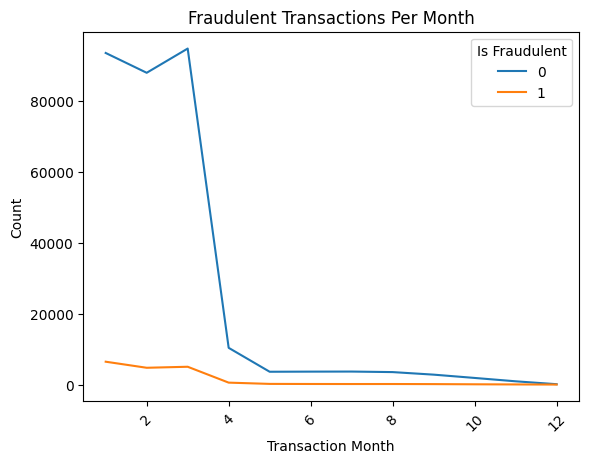

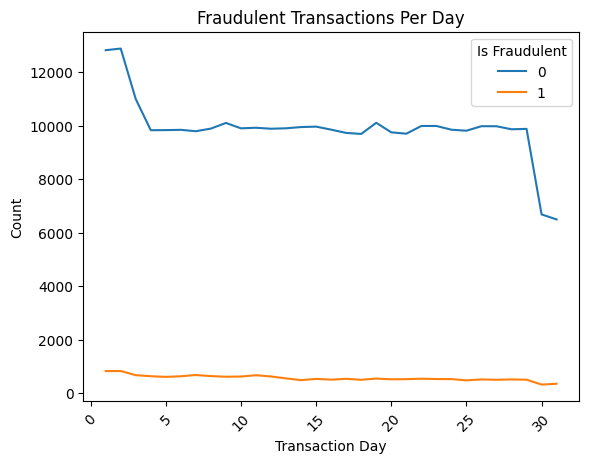

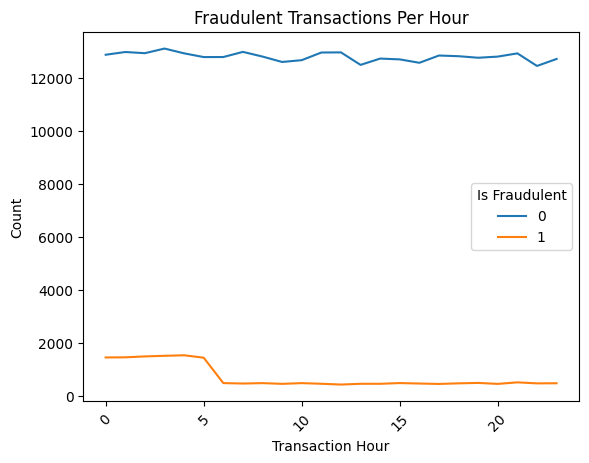

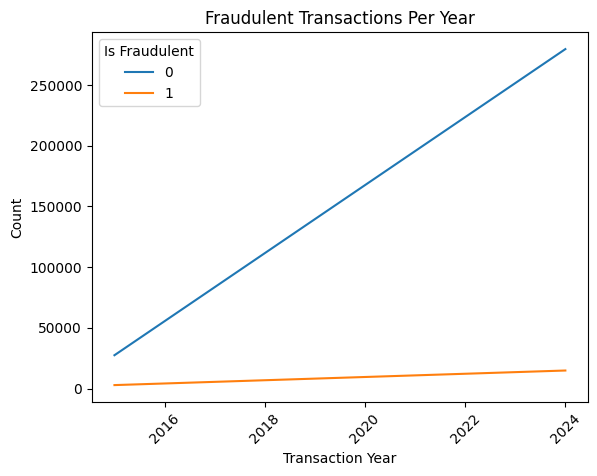

In [15]:
# Transaction Date comparison between fraudulent and legitimate transactions
merged_data["Transaction Date"] = pd.to_datetime(merged_data["Transaction Date"])
merged_data["Transaction Month"] = merged_data["Transaction Date"].dt.month
merged_data["Transaction Day"] = merged_data["Transaction Date"].dt.day
merged_data["Transaction Year"] = merged_data["Transaction Date"].dt.year

monthly_fraud = merged_data.groupby(["Transaction Month", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Month", y="Count", hue="Is Fraudulent", data=monthly_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Month")
plt.show()

daily_fraud = merged_data.groupby(["Transaction Day", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Day", y="Count", hue="Is Fraudulent", data=daily_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Day")
plt.show()

hour_fraud = merged_data.groupby(["Transaction Hour", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Hour", y="Count", hue="Is Fraudulent", data=hour_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Hour")
plt.show()

year_fraud = merged_data.groupby(["Transaction Year", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Year", y="Count", hue="Is Fraudulent", data=year_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Year")
plt.show()


The plots do not indicate any abnormalities in the data, such as outliers or unexpected values. The dataset contains only two years—2024 and 2015—due to the merging process at the beginning, where one dataset exclusively featured 2024 dates and the other contained records from 2015. Additionally, **fraudulent transactions** are more frequent between **midnight and 5 AM**, whereas non-fraudulent transactions remain relatively stable throughout this period. A slight increase in fraud is also noticeable in the early months of the year. However, since non-fraudulent transactions also rise during this period, this likely reflects a higher number of recorded transactions from the beginning of the year rather than an isolated fraud pattern.


Now, we will analyse the payment methods. 

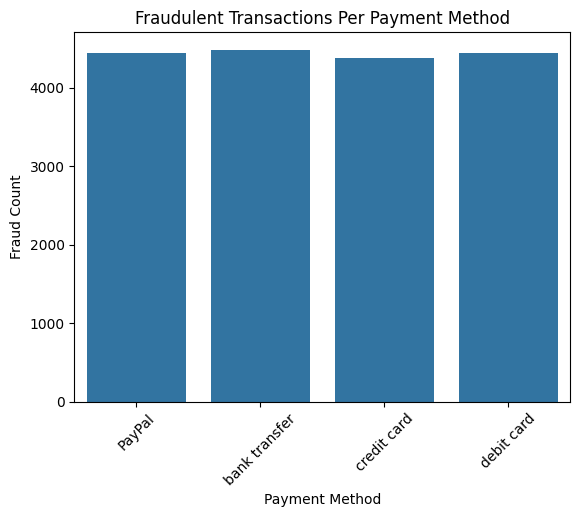

In [16]:
# Count fraudulent transactions
fraud_counts = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Payment Method").size().reset_index(name="Fraud Count")

sb.barplot(x="Payment Method", y="Fraud Count", data=fraud_counts)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Payment Method")
plt.show()

The plot indicates that the number of fraudulent transactions across payment methods is nearly identical. To enhance visualization and gain deeper insights into how payment methods influence fraud, we should compare the ratio of fraudulent transactions per method to total transactions per method.

  Payment Method  Fraud Transactions  Total Transactions
0         PayPal                4442               80898
1  bank transfer                4485               81324
2    credit card                4380               81151
3     debit card                4446               81423


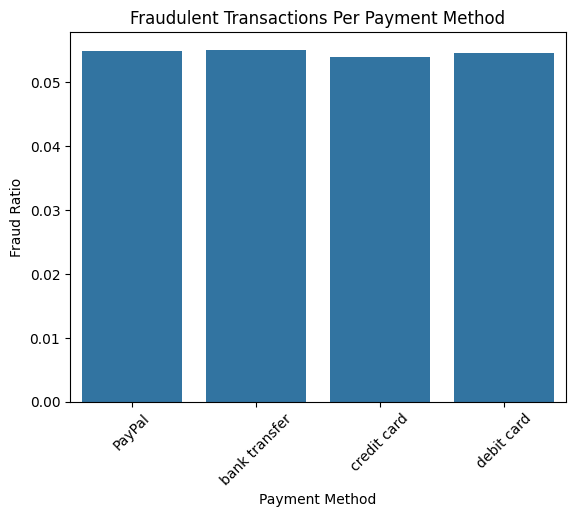

In [17]:
# Count total transactions per payment method
total_transactions = merged_data.groupby("Payment Method").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per payment method
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Payment Method").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Payment Method", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Payment Method", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Payment Method")
plt.show()

After analyzing the ratio, we can see that it remains fairly consistent across different payment methods. As a result, it does not provide meaningful insights for identifying fraudulent transactions.

Now we are going to analyse the product category.

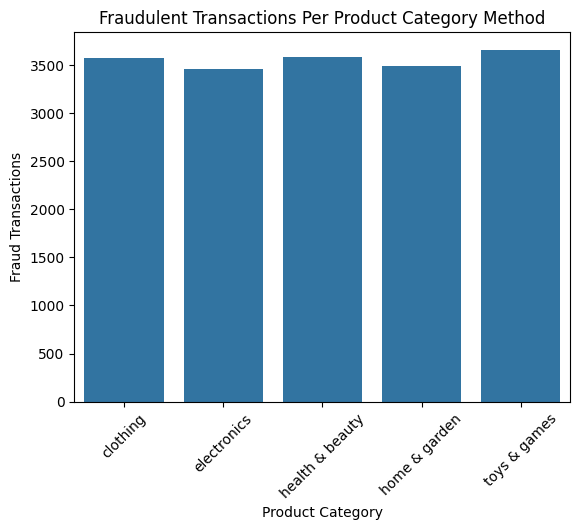

In [18]:
# Count fraudulent transactions per product category
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Product Category").size().reset_index(name="Fraud Transactions")

sb.barplot(x="Product Category", y="Fraud Transactions", data=fraud_transactions)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Product Category Method")
plt.show()

The plot indicates no clear relationship between product category and fraudulent transactions. To gain deeper insights, we should analyze the ratio of fraudulent transactions per product category relative to the total number of transactions in each category.

  Product Category  Fraud Transactions  Total Transactions
0         clothing                3569               64813
1      electronics                3454               65328
2  health & beauty                3584               65016
3    home & garden                3488               64864
4     toys & games                3658               64775


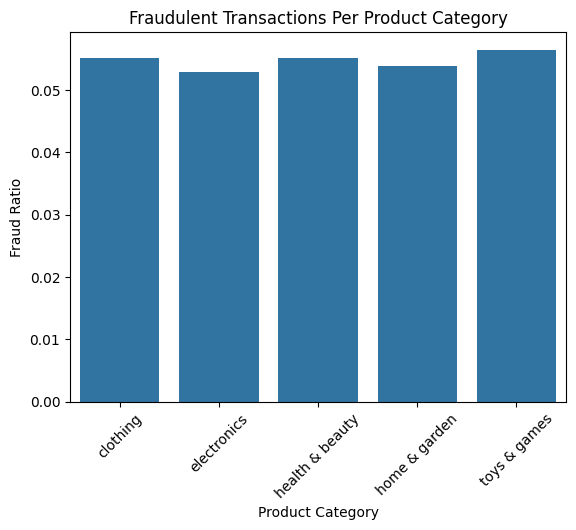

In [19]:
# Count total transactions per Product Category
total_transactions = merged_data.groupby("Product Category").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per Product Category
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Product Category").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Product Category", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Product Category", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Product Category")
plt.show()

The ratio indicates that product category is not a strong predictor of fraudulent transactions. While the **"Toys and Games"** category shows a slightly higher fraud ratio, the difference is minimal and not statistically significant.

The next column to analyse is the Quantity

count    324796.000000
mean          2.999292
std           1.416152
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Quantity, dtype: float64


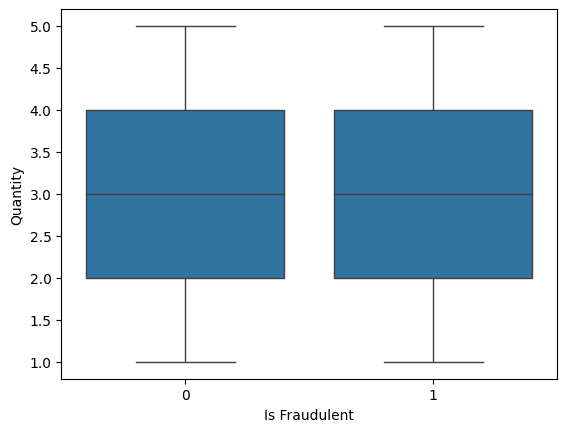

In [20]:
#Quantity comparison between fraudulent and legitimate transactions
print(merged_data["Quantity"].describe())
sb.boxplot(x="Is Fraudulent", y="Quantity", data=merged_data)
plt.show()

The quantity of items in transactions is similar for both fraudulent and non-fraudulent cases, with no detectable outliers in either category. In general, this column does not appear to be a strong indicator for identifying fraudulent transactions. 

Now we are going to analyse the customer age.

count    324796.000000
mean         34.384962
std           9.907287
min         -13.000000
25%          28.000000
50%          34.000000
75%          41.000000
max          80.000000
Name: Customer Age, dtype: float64


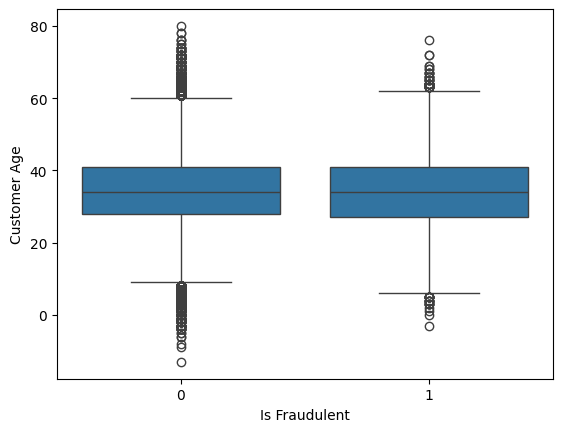

In [21]:
#Customer age comparison between fraudulent and legitimate transactions
print(merged_data["Customer Age"].describe())
sb.boxplot(x="Is Fraudulent", y="Customer Age", data=merged_data)
plt.show()

The data reveals some negative ages that need to be removed. While non-fraudulent transactions show more outliers than fraudulent ones, the average remains the same in both cases. Additionally, certain ages appear suspicious—customers under 18 should generally not be able to make transactions. The plot even shows transactions from customers under 10 years old, which is practically impossible. However, since we do not have access to the platform's age restrictions, we will only remove rows where the customer age is less than zero. In this case, outliers should not be removed—except for values over zero—since they do not significantly deviate from the average and the maximum value is a normal age for a person(80 years old). Additionally, these outliers primarily represent individuals who engage in fewer online transactions, such as the elderly and teenagers.

count    324743.000000
mean         34.391063
std           9.896536
min           0.000000
25%          28.000000
50%          34.000000
75%          41.000000
max          80.000000
Name: Customer Age, dtype: float64


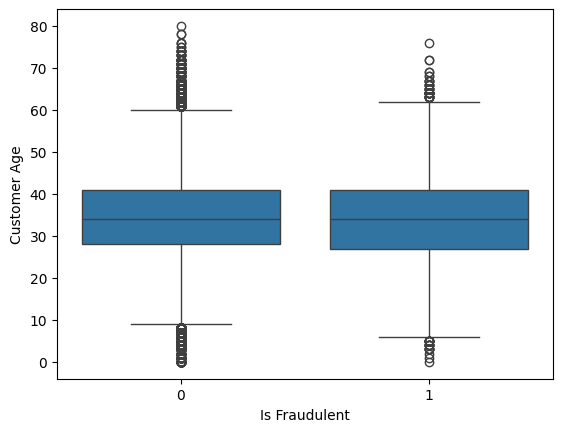

In [22]:
#Filter the data
merged_data = merged_data[merged_data["Customer Age"] >= 0]

#Customer age comparison between fraudulent and legitimate transactions with the filtered data
print(merged_data["Customer Age"].describe())
sb.boxplot(x="Is Fraudulent", y="Customer Age", data=merged_data)
plt.show()

Now, we are going to analyse the customer location.

      Customer Location  Fraud Transactions  Total Transactions  Fraud Ratio
294        Aprilchester                   3                   7     0.428571
602          Brandyfort                   3                   7     0.428571
835          Carriefort                   3                   7     0.428571
1226     Cunninghamstad                   3                   6     0.500000
2280        East Sherri                   3                   6     0.500000
5001         Leslieport                   4                  10     0.400000
5119       Lucaschester                   3                   6     0.500000
5493          Meyerview                   3                   6     0.500000
5678    Morrisonchester                   3                   7     0.428571
5718         Murraystad                   3                   7     0.428571
5721          Myersfort                   3                   7     0.428571
6722     North Amyshire                   3                   6     0.500000

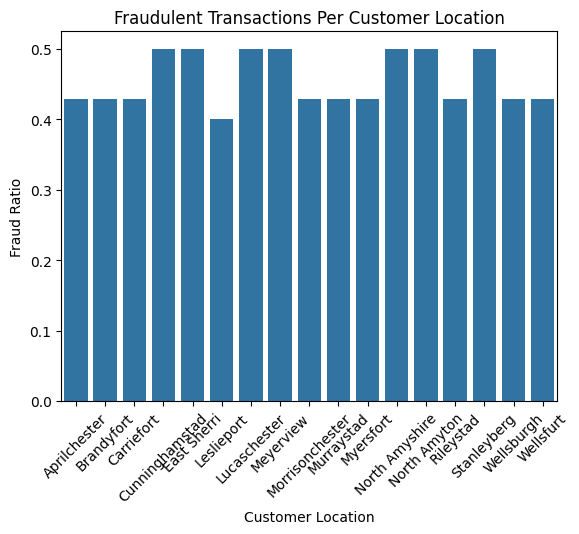

In [23]:
# Count total transactions per customer location
total_transactions = merged_data.groupby("Customer Location").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per Customer Location
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Customer Location").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Customer Location", how="left")

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

filtered_ratio = fraud_ratio[(fraud_ratio["Fraud Ratio"] >= 0.4) & (fraud_ratio["Total Transactions"] > 5)] #only shows the higher ratios (above average)
print(filtered_ratio)
print("Average Transactions per Location: " + str(total_transactions["Total Transactions"].sum() / len(total_transactions["Customer Location"].unique())))
print("Average Fraudulent Transactions per Location: " + str(fraud_transactions["Fraud Transactions"].sum() / len(total_transactions["Customer Location"].unique())))

sb.barplot(x="Customer Location", y="Fraud Ratio", data=filtered_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Customer Location")
plt.show()

The plot shows a big ratio in 17 locations considering the average number of total transactions and fraudulent transactions per location. These locations have more than 5 registered transactions and more than 40% of the transactions where flagged as fraudulent.

Now, we will analyse the devices used in the transactions.

  Device Used  Fraud Transactions  Total Transactions
0     desktop                5901              108303
1      mobile                6039              108142
2      tablet                5812              108298


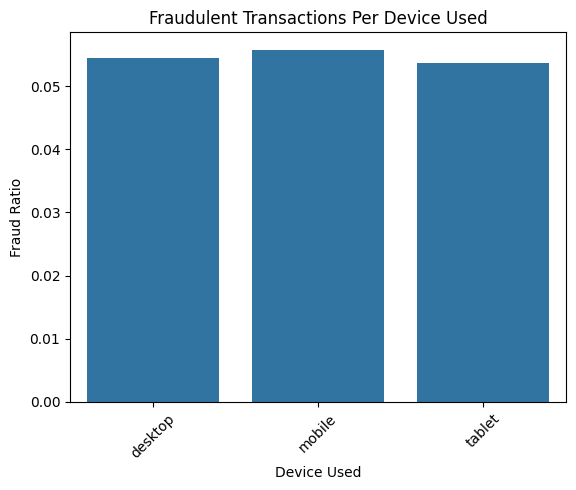

In [24]:
# Count total transactions per Device Used
total_transactions = merged_data.groupby("Device Used").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per Device Used
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Device Used").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Device Used", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Device Used", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Device Used")
plt.show()

The plot shows that mobile devices have the highest ratio of frauds but the difference compared to other kinds of devices is minimal. The device used may not be the best to predict fraudulent transactions.

The next step will be the analysis of the adress match.

   Address Match  Fraud Transactions  Total Transactions
0              0                4351               59782
1              1               13401              264961


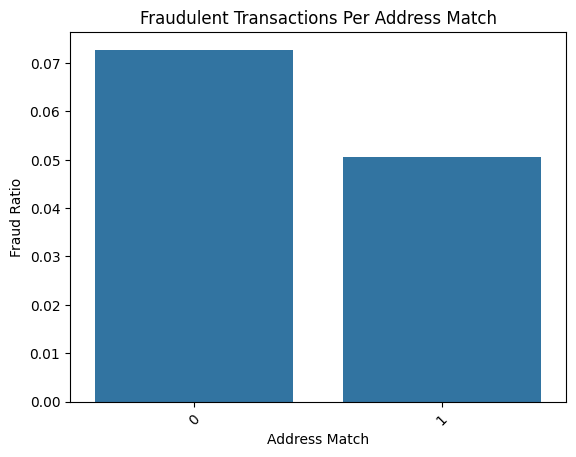

In [25]:
# Count total transactions per Device Used
total_transactions = merged_data.groupby("Address Match").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per Device Used
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Address Match").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Address Match", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Address Match", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Address Match")
plt.show()

Its clear that, when the billing and shipping addresses don't match, it is more likely the transaction to be fraudulent. However, the ratios are low in both cases.


The next step is to analyse the  account age.

count    324743.000000
mean        179.569185
std         106.954029
min           1.000000
25%          86.000000
50%         179.000000
75%         272.000000
max         365.000000
Name: Account Age Days, dtype: float64


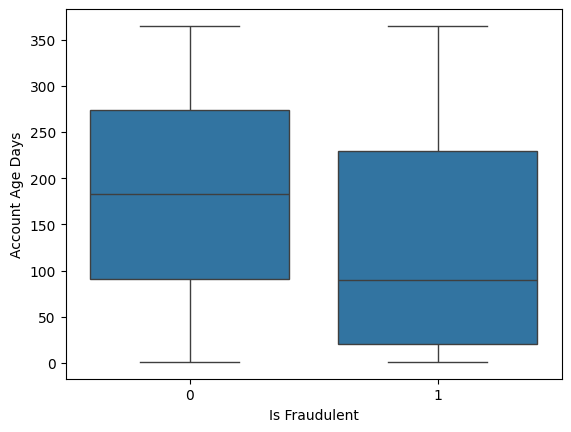

In [26]:
#Account age comparison between fraudulent and legitimate transactions
print(merged_data["Account Age Days"].describe())
sb.boxplot(x="Is Fraudulent", y="Account Age Days", data=merged_data)
plt.show()

The plot shows a clearly that the Fraudulent transactions are more predominat in newer accounts.

## ML Algorithms


The first thing we need to do is spliting the data into training and testing sets. To do this we will use scikit learn train_test_split method.

In [27]:
#We need to convert the categorical data into a number format. To do this we will use the label encoder from sickit learn
from sklearn.preprocessing import LabelEncoder
#Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical column
merged_data['Payment Method Encoded'] = label_encoder.fit_transform(merged_data['Payment Method'])
merged_data['Product Category Encoded'] = label_encoder.fit_transform(merged_data['Product Category'])
merged_data['Customer Location Encoded'] = label_encoder.fit_transform(merged_data['Customer Location'])
merged_data['Device Used Encoded'] = label_encoder.fit_transform(merged_data['Device Used'])

#Get the data from pandas. We are using almost all the columns, except the transation data but we will use the transaction day, month and hour separated. These data is going to get us the base line results 
data_for_input = merged_data[["Transaction Amount","Payment Method Encoded","Product Category Encoded","Quantity","Customer Age","Customer Location Encoded","Device Used Encoded","Account Age Days","Transaction Hour","Address Match", "Transaction Month", "Transaction Day"]]
inputs = data_for_input.values

labels = merged_data["Is Fraudulent"].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

### K Nearest Neighbors

Firstly, we will use the k nearest neighbors algorithm, one of the most simple, as a base line for other algorithms. It makes predictions based on the similarity between data points. It does not need a training phase; just stores data and calculates as needed.

In [ ]:
import time

#Get the decision tree classifier
classifier = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

init_time = time.time()
#train the model with the training data (not really training but more like a data store on this algorithm)
classifier.fit(training_inputs, training_classes)
training_time = time.time() - init_time

init_time = time.time()
#test the model with the testing data
pred = classifier.predict(testing_inputs)
testing_time = time.time() - init_time

#Get the model results
accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1= f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)


print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

Model Accuracy: 0.95
Model Precision: 0.56
Model recall: 0.11
Model f1_score: 0.18
Model confusion matrix: [[76354   372]
 [ 3987   473]]
Testing time: 0.50
Training time: 1.47


The initial performance appears promising, especially given the **95% accuracy**. However, the **recall** and **F1-score** are significantly low, suggesting a **high rate of false positives**. This issue is likely due to the dataset's imbalance, causing the algorithm to favor the **non-fraudulent class**, which is more prevalent. As we will observe, this problem affects all evaluated algorithms—some performing slightly better, others worse. To address these challenges, we will explore possible improvements in a dedicated section of the notebook.

### Decision Tree

The second algorithm we will analyze is the decison tree. This algorithm  is a rule-based model that is easy to interpret and visualize and can handle both numerical and categorical data. It is also a good base line to compare with other algorithms

In [46]:
import time

#Get the decision tree classifier
classifier = DecisionTreeClassifier()

init_time = time.time()
#train the model with the training data
classifier.fit(training_inputs, training_classes)
training_time = time.time() - init_time

init_time = time.time()
#test the model with the testing data
pred = classifier.predict(testing_inputs)
testing_time = time.time() - init_time

#Get the model results
accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1= f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)


print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

Model Accuracy: 0.91
Model Precision: 0.24
Model recall: 0.28
Model f1_score: 0.26
Model confusion matrix: [[72668  4058]
 [ 3200  1260]]
Testing time: 0.02
Training time: 4.65


The initial performance of the model was promising, achieving **91% accuracy** on the first attempt. However, accuracy alone can be misleading, as the results vary significantly depending on the data split. To enhance **consistency and reliability**, we will apply **cross-validation**, ensuring a more stable evaluation across different subsets of the dataset.

Additionally, we observed that the model exhibits **low precision, recall, and F1-score**, indicating a **high number of false positives and false negatives**—particularly false positives. This is problematic since **misclassifying a legitimate transaction as fraudulent** can have negative consequences. The apparent high accuracy is deceptive, as it does not account for the imbalance between fraudulent and non-fraudulent transactions; the latter constitutes a much larger proportion of the dataset. These problems were previously observed in the K nearest neighbors algorithm.

Now, we will implement cross-validation, which—while only providing modest improvements due to the large dataset—will contribute to more consistent results. The sheer size of the dataset already facilitates stability, but cross-validation further reinforces the reliability of our model’s performance. We will also use balanced class weights in order to improve the results. Further enhancements, such as feature selection, will be addressed in a dedicated section of the notebook to allow a more structured approach to model optimization.


In [45]:

from sklearn.model_selection import cross_validate

classifier = DecisionTreeClassifier(class_weight="balanced")

cv_decision_tree = cross_validate(classifier, inputs, labels, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'])

print(cv_decision_tree)
print(f"Average Model Accuracy: {cv_decision_tree['test_accuracy'].mean():.2f}")
print(f"Average Model Precision: {cv_decision_tree['test_precision'].mean():.2f}")
print(f"Average Model Recall: {cv_decision_tree['test_recall'].mean():.2f}")
print(f"Average Model f1_score: {cv_decision_tree['test_f1'].mean():.2f}")
print(f"Average Testing time: {cv_decision_tree['score_time'].mean():.2f}")
print(f"Training time: {cv_decision_tree['fit_time'].mean():.2f}")

{'fit_time': array([5.77684522, 5.48053455, 5.26406407, 5.69102645, 5.618747  ,
       5.238199  , 5.87191868, 5.52493238, 5.65691924, 5.1528697 ]), 'score_time': array([0.02259183, 0.02288222, 0.02177215, 0.02028537, 0.02188396,
       0.02209234, 0.02096033, 0.01974773, 0.01949692, 0.02257395]), 'test_precision': array([0.24612737, 0.26403207, 0.25463744, 0.23041998, 0.2478968 ,
       0.23965517, 0.26840317, 0.24797219, 0.25957207, 0.23955916]), 'test_recall': array([0.24169014, 0.25957207, 0.25506757, 0.22873239, 0.24901408,
       0.23492958, 0.26704225, 0.24112676, 0.25971831, 0.23267606]), 'test_f1': array([0.24388857, 0.26178308, 0.25485232, 0.22957308, 0.24845419,
       0.23726885, 0.26772098, 0.24450157, 0.25964517, 0.23606745]), 'test_accuracy': array([0.91809084, 0.91993841, 0.91842956, 0.91608672, 0.9176572 ,
       0.91744165, 0.92015151, 0.91855022, 0.91904293, 0.917688  ])}
Average Model Accuracy: 0.92
Average Model Precision: 0.25
Average Model Recall: 0.25
Average Mo

As previously mentioned, the cross-validation yielded little to no improvement.

### Support Vector Machine

The third algorithm we will analyze is the Support Vector Machine (SVM). Unlike decision trees, which use a set of rules to split the data, SVM focuses on finding the optimal boundary (hyperplane) that best separates fraudulent and legitimate transactions. SVM works by maximizing the margin between the two classes, making it effective for both linear and non-linear data through the use of different kernels. While SVM models are less interpretable than decision trees, they often provide higher accuracy, especially when the distinction between classes is not obvious. This makes SVM a strong alternative for fraud detection and a valuable comparison point for our baseline results.


In [48]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Scale features for better SVM performance
scaler = StandardScaler()
training_inputs_scaled = scaler.fit_transform(training_inputs)
testing_inputs_scaled = scaler.transform(testing_inputs)

classifier = LinearSVC(max_iter=10000, random_state=1)
init_time = time.time()
classifier.fit(training_inputs_scaled, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred = classifier.predict(testing_inputs_scaled)
testing_time = time.time() - init_time

accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1 = f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

Model Accuracy: 0.95
Model Precision: 1.00
Model recall: 0.04
Model f1_score: 0.08
Model confusion matrix: [[76726     0]
 [ 4284   176]]
Testing time: 0.00
Training time: 0.28


The initial performance of the Support Vector Machine (SVM) model appeared strong, achieving a 95% accuracy on the first attempt. However, this high accuracy is misleading due to the significant class imbalance present in the dataset. The model achieved a precision of 1.00, indicating that when it predicts a transaction as fraudulent, it is always correct. Despite this, the recall is extremely low at 0.04, meaning the model is only able to identify 4% of actual fraudulent transactions. This results in a very low F1-score of 0.08, highlighting the model’s inability to effectively detect fraud.

The confusion matrix further illustrates this issue, as the model predicts almost all transactions as non-fraudulent, missing the vast majority of fraudulent cases. This is problematic in a fraud detection context, where failing to identify fraudulent transactions (high false negatives) can have serious consequences. The high accuracy is primarily a reflection of the overwhelming number of legitimate transactions, rather than the model’s ability to detect fraud.

To address these shortcomings, we will explore techniques such as class balancing, threshold adjustment, and cross-validation to improve the model’s recall and overall robustness. These steps are essential to ensure the model is not only accurate but also effective at identifying fraudulent activity. Further enhancements, including feature selection and algorithm tuning, will be discussed in subsequent sections of the notebook.

In [49]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Scale features for better SVM performance
scaler = StandardScaler()
training_inputs_scaled = scaler.fit_transform(training_inputs)
testing_inputs_scaled = scaler.transform(testing_inputs)

# Add class_weight='balanced'
classifier = LinearSVC(max_iter=10000, random_state=1, class_weight='balanced')
init_time = time.time()
classifier.fit(training_inputs_scaled, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred = classifier.predict(testing_inputs_scaled)
testing_time = time.time() - init_time

accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1 = f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)
    
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

Model Accuracy: 0.70
Model Precision: 0.11
Model recall: 0.65
Model f1_score: 0.19
Model confusion matrix: [[54258 22468]
 [ 1581  2879]]
Testing time: 0.00
Training time: 0.33


The introduction of class balancing to the Support Vector Machine (SVM) model led to a significant shift in performance metrics. The overall accuracy dropped to 70%, reflecting the model’s increased focus on identifying the minority class (fraudulent transactions). Notably, the recall improved dramatically to 0.65, indicating that the model is now able to correctly identify 65% of actual fraudulent transactions. However, this improvement in recall comes at the expense of precision, which fell to 0.11, meaning that many transactions flagged as fraudulent are actually legitimate. The F1-score increased to 0.19, showing a better balance between precision and recall compared to the previous model.

The confusion matrix highlights this trade-off: while the model now detects a much larger proportion of fraud cases, it also misclassifies a significant number of legitimate transactions as fraudulent (high false positives). This is a common outcome when addressing class imbalance, as the model becomes more sensitive to the minority class but less precise overall.

These results demonstrate that class balancing is effective in improving the model’s ability to detect fraud, but further refinement is needed to reduce false positives and improve precision. Next steps may include threshold adjustment, feature selection, or exploring alternative algorithms to achieve a better balance between recall and precision.



### Logistic Regression

The next algorithm we will analyze is Logistic Regression. This is a linear model that estimates the probability of a transaction being fraudulent or legitimate using a logistic function. It is simple yet effective, especially for problems where the relationship between features and the target is roughly linear.

Unlike decision trees, which create explicit rules, Logistic Regression produces a model that outputs probabilities, which can be useful for ranking or threshold tuning. However, Logistic Regression can be sensitive to class imbalance and may require techniques like class weighting or resampling to better detect rare fraud cases. It provides a good baseline for comparing more complex models in fraud detection tasks.


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Scale features for better Logistic Regression performance
scaler = StandardScaler()
training_inputs_scaled = scaler.fit_transform(training_inputs)
testing_inputs_scaled = scaler.transform(testing_inputs)

classifier = LogisticRegression(max_iter=10000, random_state=1)
init_time = time.time()
classifier.fit(training_inputs_scaled, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred = classifier.predict(testing_inputs_scaled)
testing_time = time.time() - init_time

accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1 = f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model F1-Score: {f1:.2f}")
print(f"Confusion Matrix:\n{c_matrix}")
print(f"Training time: {training_time:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


Model Accuracy: 0.95
Model Precision: 0.91
Model Recall: 0.08
Model F1-Score: 0.15
Confusion Matrix:
[[76690    36]
 [ 4095   365]]
Training time: 0.11 seconds
Testing time: 0.00 seconds


As with the SVM, the initial Logistic Regression model shows high accuracy and precision but poor recall due to the class imbalance in the dataset. This means while the model correctly classifies most legitimate transactions, it misses a large number of fraudulent cases, which is typical in fraud detection datasets, where the majority class dominates.

To improve recall and better detect fraudulent transactions, we introduce class weighting in the Logistic Regression model, which penalizes misclassification of the minority class more heavily. This adjustment aims to make the model more sensitive to fraud, even at the expense of misclassifying some legitimate transactions.


In [51]:
# Logistic Regression with class_weight balanced
classifier_balanced = LogisticRegression(max_iter=10000, random_state=1, class_weight='balanced')
init_time = time.time()
classifier_balanced.fit(training_inputs_scaled, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred_balanced = classifier_balanced.predict(testing_inputs_scaled)
testing_time = time.time() - init_time

accuracy_balanced = accuracy_score(testing_classes, pred_balanced)
precision_balanced = precision_score(testing_classes, pred_balanced)
recall_balanced = recall_score(testing_classes, pred_balanced)
f1_balanced = f1_score(testing_classes, pred_balanced)
c_matrix_balanced = confusion_matrix(testing_classes, pred_balanced)

print(f"Balanced Model Accuracy: {accuracy_balanced:.2f}")
print(f"Balanced Model Precision: {precision_balanced:.2f}")
print(f"Balanced Model Recall: {recall_balanced:.2f}")
print(f"Balanced Model F1-Score: {f1_balanced:.2f}")
print(f"Balanced Confusion Matrix:\n{c_matrix_balanced}")
print(f"Training time: {training_time:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


Balanced Model Accuracy: 0.70
Balanced Model Precision: 0.11
Balanced Model Recall: 0.65
Balanced Model F1-Score: 0.19
Balanced Confusion Matrix:
[[54048 22678]
 [ 1577  2883]]
Training time: 0.20 seconds
Testing time: 0.00 seconds


After introducing class weighting to penalize misclassification of fraudulent transactions more heavily, the recall improved significantly to 65%, showing a much better ability to identify fraud cases. However, this improvement came at a substantial cost to precision, which dropped to 11%, and the overall accuracy fell to 70%. This means many legitimate transactions are now being misclassified as fradulent, potentially leading to more false alarms. The F1-Score increased to 19%, showing a better balance between precision and recall, compared to previous model.

### CatBoost Classifier
CatBoost is a gradient boosting algorithm that performs especially well on tabular datasets like the one used in this fraud detection task. It is known for its strong performance with minimal preprocessing and is robust to class imbalance when using class weights.

In the context of fraud detection, where fraudulent transactions are rare and hard to detect, CatBoost is a powerful model choice. It captures complex patterns in the data and can help improve recall without severely sacrificing precision, making it suitable for identifying more fraudulent cases.

Below, we train a CatBoost classifier with adjusted class_weights to account for the imbalance between legitimate and fraudulent transactions, and then evaluate its performance.

In [52]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Initialize CatBoostClassifier
classifier_cb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=1,
    verbose=0,  # suppress training output
    class_weights=[1, 12]  # penalize minority class (fraud) more heavily
)

init_time = time.time()
classifier_cb.fit(training_inputs, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred_cb = classifier_cb.predict(testing_inputs)
testing_time = time.time() - init_time

accuracy_cb = accuracy_score(testing_classes, pred_cb)
precision_cb = precision_score(testing_classes, pred_cb)
recall_cb = recall_score(testing_classes, pred_cb)
f1_cb = f1_score(testing_classes, pred_cb)
c_matrix_cb = confusion_matrix(testing_classes, pred_cb)

print(f"CatBoost Accuracy: {accuracy_cb:.2f}")
print(f"CatBoost Precision: {precision_cb:.2f}")
print(f"CatBoost Recall: {recall_cb:.2f}")
print(f"CatBoost F1-Score: {f1_cb:.2f}")
print(f"CatBoost Confusion Matrix:\n{c_matrix_cb}")
print(f"Training time: {training_time:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


CatBoost Accuracy: 0.88
CatBoost Precision: 0.25
CatBoost Recall: 0.57
CatBoost F1-Score: 0.35
CatBoost Confusion Matrix:
[[69065  7661]
 [ 1908  2552]]
Training time: 12.25 seconds
Testing time: 0.34 seconds


The CatBoost model achieves a balanced improvement, with recall at 0.57—slightly below the highest recall observed (0.65)—but significantly better F1-score (0.35), outperforming all other tested algorithms. This indicates CatBoost is better at balancing precision and recall, making it more effective overall for fraud detection. The use of class weights helps the model focus on the minority class, improving fraud detection without excessively increasing false positives.

### XGBoost
XGBoost is a highly efficient implementation of gradient boosting, optimized for speed and accuracy.
It handles class imbalance through the `scale_pos_weight` parameter, which is useful for fraud detection.


In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import numpy as np

unique, counts = np.unique(training_classes, return_counts=True)
scale_pos_weight = counts[0] / counts[1]

classifier_xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    random_state=1,
    scale_pos_weight=scale_pos_weight,  # boost importance of minority class
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

init_time = time.time()
classifier_xgb.fit(training_inputs, training_classes)
training_time_xgb = time.time() - init_time

init_time = time.time()
pred_xgb = classifier_xgb.predict(testing_inputs)
testing_time_xgb = time.time() - init_time

accuracy_xgb = accuracy_score(testing_classes, pred_xgb)
precision_xgb = precision_score(testing_classes, pred_xgb)
recall_xgb = recall_score(testing_classes, pred_xgb)
f1_xgb = f1_score(testing_classes, pred_xgb)
c_matrix_xgb = confusion_matrix(testing_classes, pred_xgb)

print("### XGBoost Classifier")
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost Precision: {precision_xgb:.2f}")
print(f"XGBoost Recall: {recall_xgb:.2f}")
print(f"XGBoost F1-Score: {f1_xgb:.2f}")
print(f"XGBoost Confusion Matrix:\n{c_matrix_xgb}")
print(f"Training time: {training_time_xgb:.2f} seconds")
print(f"Testing time: {testing_time_xgb:.2f} seconds")

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:03:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### XGBoost Classifier
XGBoost Accuracy: 0.84
XGBoost Precision: 0.20
XGBoost Recall: 0.60
XGBoost F1-Score: 0.30
XGBoost Confusion Matrix:
[[65943 10783]
 [ 1804  2656]]
Training time: 1.81 seconds
Testing time: 0.08 seconds


### Random Forest Classifier
Random Forest is an ensemble learning method that constructs multiple decision trees and outputs the mode of their predictions.
It is effective for tabular data and can handle class imbalance using the `class_weight='balanced'` parameter.


In [54]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=1,
    class_weight='balanced',  # automatically adjust weights inversely proportional to class frequencies
    n_jobs=-1
)

init_time = time.time()
classifier_rf.fit(training_inputs, training_classes)
training_time_rf = time.time() - init_time

init_time = time.time()
pred_rf = classifier_rf.predict(testing_inputs)
testing_time_rf = time.time() - init_time

accuracy_rf = accuracy_score(testing_classes, pred_rf)
precision_rf = precision_score(testing_classes, pred_rf)
recall_rf = recall_score(testing_classes, pred_rf)
f1_rf = f1_score(testing_classes, pred_rf)
c_matrix_rf = confusion_matrix(testing_classes, pred_rf)

print("### Random Forest Classifier")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Precision: {precision_rf:.2f}")
print(f"Random Forest Recall: {recall_rf:.2f}")
print(f"Random Forest F1-Score: {f1_rf:.2f}")
print(f"Random Forest Confusion Matrix:\n{c_matrix_rf}")
print(f"Training time: {training_time_rf:.2f} seconds")
print(f"Testing time: {testing_time_rf:.2f} seconds")

### Random Forest Classifier
Random Forest Accuracy: 0.95
Random Forest Precision: 0.76
Random Forest Recall: 0.17
Random Forest F1-Score: 0.27
Random Forest Confusion Matrix:
[[76489   237]
 [ 3712   748]]
Training time: 5.01 seconds
Testing time: 0.34 seconds


## ML Algorithm with enhancements 

In this section we will improve the results previously obtained. We will try to find the best feature set and parameters for each algorithm in order to get the best results possible.

We will use SelectKBest to find the best features.

In [47]:
from sklearn.feature_selection import RFE, SelectKBest


selector = SelectKBest(k=5)  # Select top 5 features
X_selected = selector.fit_transform(inputs, labels)
selected_indices = selector.get_support(indices=True)
selected_features_names = [ data_for_input.iloc[:, idx].name for idx in selected_indices]
print(selected_features_names)


['Transaction Amount', 'Account Age Days', 'Transaction Hour', 'Address Match', 'Transaction Month']


It is possible to see that the features selected by the algorithm are the ones we previously analised to be more relevant to the classification of fraudulent transactions.

Now we need to create a new testing and training set only with these selected features

In [48]:
#Get the data from pandas. We are using almost all the columns, except the transation data but we will use the transaction day, month and hour separated. These data is going to get us the base line results 
data_for_input = merged_data[selected_features_names]
inputs = data_for_input.values

labels = merged_data["Is Fraudulent"].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

### Enhanced Decision Tree

The first results we will try to improve are the ones from the decision tree algorithm. We will use the improved feature set and set the class weight as balanced.

In [49]:
#Get the decision tree classifier
classifier = DecisionTreeClassifier(class_weight="balanced")

init_time = time.time()
#train the model with the training data
classifier.fit(training_inputs, training_classes)
training_time = time.time() - init_time

init_time = time.time()
#test the model with the testing data
pred = classifier.predict(testing_inputs)
testing_time = time.time() - init_time

#Get the model results
accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1= f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)


print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

Model Accuracy: 0.92
Model Precision: 0.25
Model recall: 0.24
Model f1_score: 0.25
Model confusion matrix: [[73449  3277]
 [ 3370  1090]]
Testing time: 0.02
Training time: 2.79


In [50]:
cv_decision_tree = cross_validate(classifier, inputs, labels, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'])

print(cv_decision_tree)

print(f"Average Model Accuracy: {cv_decision_tree['test_accuracy'].mean():.2f}")
print(f"Average Model Precision: {cv_decision_tree['test_precision'].mean():.2f}")
print(f"Average Model Recall: {cv_decision_tree['test_recall'].mean():.2f}")
print(f"Average Model f1_score: {cv_decision_tree['test_f1'].mean():.2f}")
print(f"Average Testing time: {cv_decision_tree['score_time'].mean():.2f}")
print(f"Training time: {cv_decision_tree['fit_time'].mean():.2f}")

{'fit_time': array([2.98620844, 2.98863339, 3.02364421, 2.96022058, 2.60976028,
       2.75688386, 2.79646039, 3.0558238 , 3.14685535, 2.41774249]), 'score_time': array([0.02230406, 0.0250423 , 0.04994321, 0.02151322, 0.02088714,
       0.02118611, 0.0233233 , 0.05040979, 0.02048588, 0.02019978]), 'test_precision': array([0.24329055, 0.26777251, 0.27829638, 0.24135911, 0.24250832,
       0.26239908, 0.25780806, 0.23195876, 0.25312145, 0.26556992]), 'test_recall': array([0.23492958, 0.2545045 , 0.26858108, 0.23211268, 0.24619718,
       0.25633803, 0.25577465, 0.22816901, 0.25126761, 0.25464789]), 'test_f1': array([0.23903697, 0.26096998, 0.27335244, 0.23664561, 0.24433883,
       0.25933314, 0.25678733, 0.23004828, 0.25219112, 0.25999425]), 'test_accuracy': array([0.9182448 , 0.92117013, 0.92190916, 0.9181499 , 0.91676418,
       0.91996674, 0.91907372, 0.91651783, 0.91855022, 0.92076738])}
Average Model Accuracy: 0.92
Average Model Precision: 0.25
Average Model Recall: 0.25
Average Mo

The results show that the improved data set is not impacting the results from decision tree algorithm. To help improve even more the results, we will going to perform a parameter tuning using gridSearchCV

In [ ]:
# Define the hyperparameter grid
from sklearn.model_selection import GridSearchCV


param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(2,30)],
    'max_features': [i for i in range(2,11)]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'], refit='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(training_inputs, training_classes)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.2f}')

In [ ]:
best_index = grid_search.best_index_
print(f"Average Model Accuracy: {grid_search.cv_results_['mean_test_accuracy'][best_index]:.2f}")
print(f"Average Model Precision: {grid_search.cv_results_['mean_test_precision'][best_index].mean():.2f}")
print(f"Average Model Recall: {grid_search.cv_results_['mean_test_recall'][best_index].mean():.2f}")
print(f"Average Model f1_score: {grid_search.cv_results_['mean_test_f1'][best_index].mean():.2f}")
print(f"Average Testing time: {grid_search.cv_results_['mean_score_time'][best_index].mean():.2f}")
print(f"Training time: {grid_search.cv_results_['mean_fit_time'][best_index].mean():.2f}")

Average Model Accuracy: 0.95
Average Model Precision: 0.81
Average Model Recall: 0.13
Average Model f1_score: 0.22
Average Testing time: 0.02
Training time: 0.71


Using the best possible parameters to get the highest accuracy possible we **increase both the accuracy and precision**. However the **recall and f1_score became worse**. This indicates that When the model predicts fraud, it's often correct. This suggests **low false positives**, meaning legitimate transactions are not frequently misclassified as fraud. However, the model misses most fraudulent transactions. A **high number of false negatives** means fraudulent transactions are not being flagged effectively.

To improve the fraud detection while mantaing low the number of false positives and negative, we can use as refit value the f1_score. The f1_score gives the balace between the precision and recall values

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(2,30)],
    'max_features': [i for i in range(2,11)]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'], refit='f1', n_jobs=-1)

# Fit the model
grid_search.fit(training_inputs, training_classes)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.2f}')

Best Parameters: {'criterion': 'gini', 'max_depth': 21, 'max_features': 2, 'splitter': 'best'}
Best Accuracy: 0.26


In [ ]:
best_index = grid_search.best_index_
print(f"Average Model Accuracy: {grid_search.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Average Model Precision: {grid_search.cv_results_["mean_test_precision"][best_index].mean():.2f}")
print(f"Average Model Recall: {grid_search.cv_results_["mean_test_recall"][best_index].mean():.2f}")
print(f"Average Model f1_score: {grid_search.cv_results_["mean_test_f1"][best_index].mean():.2f}")
print(f"Average Testing time: {grid_search.cv_results_["mean_score_time"][best_index].mean():.2f}")
print(f"Training time: {grid_search.cv_results_["mean_fit_time"][best_index].mean():.2f}")

Average Model Accuracy: 0.94
Average Model Precision: 0.34
Average Model Recall: 0.21
Average Model f1_score: 0.26
Average Testing time: 0.02
Training time: 0.67


We see that the best f1_score possible to obtain is 0.26 wich is very bad. Both the precision and recall are very low. This shows that this dataset and problem may not be ideal for the Decision tree algorithm.

### Enhanced Support Vector Machine

Next we will try to improve the results given by the Support Vector Machine algorithm.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Scale the data
scaler = StandardScaler()
training_inputs_scaled = scaler.fit_transform(training_inputs)
testing_inputs_scaled = scaler.transform(testing_inputs)

# Define parameter grid for LinearSVC
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    LinearSVC(max_iter=10000, random_state=1, class_weight="balanced"),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(training_inputs_scaled, training_classes)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Evaluate on test set
best_linear_svm = grid_search.best_estimator_
pred = best_linear_svm.predict(testing_inputs_scaled)
print("Test Accuracy:", round(accuracy_score(testing_classes, pred), 2))
print("Test Precision:", round(precision_score(testing_classes, pred), 2))
print("Test Recall:", round(recall_score(testing_classes, pred), 2))
print("Test F1-score:", round(f1_score(testing_classes, pred), 2))
print("Confusion Matrix:\n", confusion_matrix(testing_classes, pred))

Best parameters: {'C': 0.1, 'class_weight': 'balanced'}
Best F1-score: 0.19169832283135313
Test Accuracy: 0.7
Test Precision: 0.11
Test Recall: 0.64
Test F1-score: 0.19
Confusion Matrix:
 [[54242 22484]
 [ 1610  2850]]


We can see that the linear SVM can identify a good portion of fraudulent transactions (recall ≈ 0.64), but at cost at many false positives since the precision is very low. This is a normal trade-off in imbalanced datasets like ours.